# Pandas 基本介绍

## 两个数据结构：Series和DataFrame

In [1]:
import pandas as pd
import numpy as np
s = pd.Series([1,3,6,np.nan,44,1])

print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


In [2]:
# Series的字符串表现形式为：索引在左边，值在右边。
# 由于我们没有为数据指定索引。于是会自动创建一个0到N-1（N为长度）的整数型索引

In [3]:
# DataFrame 的创建
dates = pd.date_range('20160101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])

print(df)

                   a         b         c         d
2016-01-01  1.163500 -0.542849 -0.207386 -0.222758
2016-01-02 -0.891622  1.251497  0.917986 -1.394507
2016-01-03  2.216656 -1.596512  0.052988  1.923701
2016-01-04 -1.226219 -0.094178  1.302199 -1.245210
2016-01-05 -0.368439  0.165925  0.397483 -0.219779
2016-01-06 -0.950660 -0.032140  0.179451  0.485707


In [4]:
# DataFrame是一个表格型的数据结构，它包含有一组有序的列，每列可以是不同的值类型（数值，字符串，布尔值等）。
# DataFrame既有行索引也有列索引， 它可以被看做由Series组成的大字典。
print(df['b'])

2016-01-01   -0.542849
2016-01-02    1.251497
2016-01-03   -1.596512
2016-01-04   -0.094178
2016-01-05    0.165925
2016-01-06   -0.032140
Freq: D, Name: b, dtype: float64


In [5]:
# 我们在创建一组没有给定行标签和列标签的数据 df1
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [6]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
                    
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [7]:
print(df2.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [8]:
print(df2.index)

Int64Index([0, 1, 2, 3], dtype='int64')


In [9]:
print(df2.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [10]:
print(df2.values)

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


In [11]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [12]:
print(df2.T)

                     0                    1                    2  \
A                    1                    1                    1   
B  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2013-01-02 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


In [13]:
# 对数据的 index 进行排序并输出
print(df2.sort_index(axis=1, ascending=False))

     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-02  1.0
1  foo  train  3  1.0 2013-01-02  1.0
2  foo   test  3  1.0 2013-01-02  1.0
3  foo  train  3  1.0 2013-01-02  1.0


In [14]:
# 对数据 值 排序输出
print(df2.sort_values(by='B'))

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


# Pandas 选择数据

In [15]:
# 建立一个 6 * 4 的矩阵
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])

In [16]:
print(df['A'])
print(df.A)

2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32
2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32


In [17]:
# 跨行选取
print(df[0:3])

            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11


In [18]:
print(df['20130102':'20130104'])

             A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15


### loc：使用标签来选择数据 loc

In [19]:
# 通过选择某行或者所有行（:代表所有行）然后选其中某一列或几列数据
print(df.loc['20130102'])

A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32


In [20]:
print(df.loc[:,['A','B']]) 

             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21


In [21]:
print(df.loc['20130102',['A','B']])

A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int32


### iloc：通过位置选择在不同情况下所需要的数据例如选某一个，连续选或者跨行选等操作

In [22]:
print(df.iloc[3,1])

13


In [23]:
print(df.iloc[3:5,1:3])

             B   C
2013-01-04  13  14
2013-01-05  17  18


In [24]:
print(df.iloc[[1,3,5],1:3])

             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22


### ix：采用混合选择 ix, 其中选择’A’和’C’的两列，并选择前三行的数据

In [25]:
print(df.ix[:3,['A','C']])

            A   C
2013-01-01  0   2
2013-01-02  4   6
2013-01-03  8  10


C:\Users\Sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


## 使用判断

In [26]:
# 采用判断指令 (Boolean indexing) 进行选择. 我们可以约束某项条件然后选择出当前所有数据
print(df[df.A>8])

             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


# Pandas 设置值

In [30]:
# 建立了一个 6 * 4 的矩阵数据
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [31]:
# 利用索引或者标签确定需要修改值的位置
df.iloc[2,2] = 1111
df.loc['20130101','B'] = 2222
print(df)

             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23


In [32]:
# 更改B中的数, 而更改的位置是取决于 A 的
# 对于A大于4的位置. 更改B在相应位置上的数为0
df.B[df.A>4] = 0
print(df)

             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     0  1111  11
2013-01-04  12     0    14  15
2013-01-05  16     0    18  19
2013-01-06  20     0    22  23


In [33]:
# 对整列做批处理, 加上一列 ‘F’, 并将 F 列全改为 NaN
df['F'] = np.nan
print(df)

             A     B     C   D   F
2013-01-01   0  2222     2   3 NaN
2013-01-02   4     5     6   7 NaN
2013-01-03   8     0  1111  11 NaN
2013-01-04  12     0    14  15 NaN
2013-01-05  16     0    18  19 NaN
2013-01-06  20     0    22  23 NaN


In [34]:
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101',periods=6)) 
print(df)

             A     B     C   D   F  E
2013-01-01   0  2222     2   3 NaN  1
2013-01-02   4     5     6   7 NaN  2
2013-01-03   8     0  1111  11 NaN  3
2013-01-04  12     0    14  15 NaN  4
2013-01-05  16     0    18  19 NaN  5
2013-01-06  20     0    22  23 NaN  6


# Pandas 处理丢失数据

In [35]:
# 建立了一个6 * 4的矩阵数据并且把两个位置置为空
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


In [36]:
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    ) 
print(df)

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


In [37]:
# 将 NaN 的值用其他值代替, 比如代替成 0
df.fillna(value=0)
print(df)

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


In [38]:
# 判断是否有缺失数据 NaN, 为 True 表示缺失数据
df.isnull() 

,A,B,C,D
2013-01-01,False,True,False,False
2013-01-02,False,False,True,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


In [39]:
# 检测在数据中是否存在 NaN, 如果存在就返回 True
np.any(df.isnull()) == True  

True

# Pandas 导入导出

# Pandas 合并 concat

## axis (合并方向)

In [42]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

#concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)

#打印结果
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


## ignore_index (重置 index)

In [43]:
#承上一个例子，并将index_ignore设定为True
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

#打印结果
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


## join (合并方式)

In [44]:
# join='outer'为预设值，因此未设定任何参数时，函数默认join='outer'
# 依照column来做纵向合并，有相同的column上下合并在一起，其他独自的column个自成列，原本没有值的位置皆以NaN填充
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#纵向"外"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='outer')

print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [45]:
# 只有相同的column合并在一起，其他的会被抛弃
#承上一个例子

#纵向"内"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='inner')

#打印结果
print(res)

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


In [46]:
#重置index并打印结果
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


## join_axes (依照 axes 合并)

In [47]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#依照`df1.index`进行横向合并
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])

#打印结果
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


In [48]:
#移除join_axes，并打印结果
res = pd.concat([df1, df2], axis=1)
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


### append (添加数据)

In [49]:
# append只有纵向合并，没有横向合并。
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

#将df2合并到df1的下面，以及重置index，并打印出结果
res = df1.append(df2, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


In [50]:
#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果
res = df1.append([df2, df3], ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


In [51]:
#合并series，将s1合并至df1，以及重置index，并打印出结果
res = df1.append(s1, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


# Pandas 合并 merge

In [52]:
# pandas中的merge和concat类似,但主要是用于两组有key column的数据,统一索引的数据. 
# 通常也被用在Database的处理当中

## 依据一组key合并

In [53]:
#定义资料集并打印出
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})

print(left)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3


In [54]:
print(right)

    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3


In [55]:
#依据key column合并，并打印出
res = pd.merge(left, right, on='key')

print(res)

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3


## 依据两组key合并

In [56]:
# 合并时有4种方法how = ['left', 'right', 'outer', 'inner']，预设值how='inner'
#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

print(left)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1


In [57]:
print(right)

    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


In [58]:
#依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)

    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2


In [59]:
res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)

     A    B key1 key2    C    D
0   A0   B0   K0   K0   C0   D0
1   A1   B1   K0   K1  NaN  NaN
2   A2   B2   K1   K0   C1   D1
3   A2   B2   K1   K0   C2   D2
4   A3   B3   K2   K1  NaN  NaN
5  NaN  NaN   K2   K0   C3   D3


In [60]:
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C1   D1
3  A2  B2   K1   K0   C2   D2
4  A3  B3   K2   K1  NaN  NaN


In [61]:
res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)

     A    B key1 key2   C   D
0   A0   B0   K0   K0  C0  D0
1   A2   B2   K1   K0  C1  D1
2   A2   B2   K1   K0  C2  D2
3  NaN  NaN   K2   K0  C3  D3


## Indicator

In [62]:
# indicator=True会将合并的记录放在新的一列。

In [63]:
#定义资料集并打印出
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})

print(df1)

   col1 col_left
0     0        a
1     1        b


In [64]:
print(df2)

   col1  col_right
0     1          2
1     2          2
2     2          2


In [65]:
# 依据col1进行合并，并启用indicator=True，最后打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [66]:
# 自定indicator column的名称，并打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


## 依据index合并

In [67]:
#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

print(left)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2


In [68]:
print(right)

     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [69]:
#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [70]:
#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


## 解决overlapping的问题

In [71]:
#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})

#使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

   age_boy   k  age_girl
0        1  K0         4
1        1  K0         5


# Pandas plot 出图

In [72]:
import matplotlib.pyplot as plt

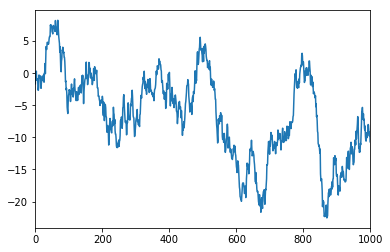

In [76]:
# 随机生成1000个数据
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
 
# 为了方便观看效果, 我们累加这个数据
data = data.cumsum()

# pandas 数据可以直接观看其可视化形式
data.plot()

plt.show()

## Dataframe 可视化

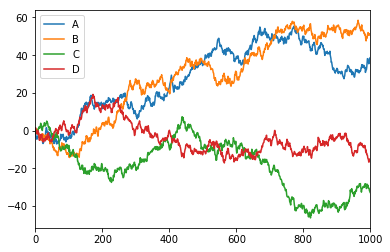

In [77]:
# 生成一个1000*4 的DataFrame，并对他们累加
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
    )
data = data.cumsum()
data.plot()
plt.show()